<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/Python-%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E5%9F%BA%E7%A4%8E%E9%A4%8A%E6%88%90_%E5%AF%A6%E6%88%B0-%E7%A4%BE%E7%BE%A4%E5%85%B1%E5%AD%B8/Task_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLite介紹

##建立 SQLite 資料庫

In [11]:
#在Python程式碼中，我們可以使用SQLite3模組中的connect()函數來建立SQLite資料庫
import sqlite3
conn = sqlite3.connect('example.db')

##在資料庫中建立資料表

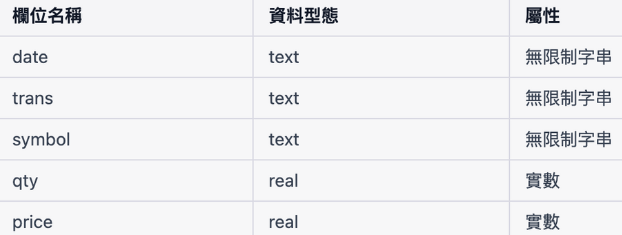

In [12]:
# CREATE TABLE 創立表格
conn = sqlite3.connect('example.db')
c = conn.cursor()

c.execute('''CREATE TABLE stocks
      (date text, trans text, symbol text, qty real, price real)''')

conn.commit() #送出修改內容
conn.close()

##在資料表中新增一筆資料

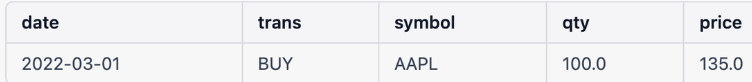

In [14]:
# INSERT INTO xxx VALUES(yyy) 新增資料
conn = sqlite3.connect('example.db')
c = conn.cursor()
c.execute("INSERT INTO stocks VALUES ('2022-03-01', 'BUY', 'AAPL', 100, 135.0)")

conn.commit()
conn.close()

## 顯示表格

In [16]:
# 在py中顯示表格
conn = sqlite3.connect('example.db')
c = conn.cursor()
c.execute('SELECT * FROM stocks')

rows = c.fetchall()

for row in rows:
    print(row)
conn.close()

('2022-03-01', 'BUY', 'AAPL', 100.0, 135.0)


##在資料表中修改資料

In [17]:
conn = sqlite3.connect('example.db')
c = conn.cursor()

c.execute("UPDATE stocks SET qty = 200 WHERE symbol = 'AAPL'")

conn.commit()
conn.close()
#以上的程式碼會修改 "stocks" 資料表中符合股票代號為 AAPL 的資料，將該筆資料的數量修改為 200。

###從資料表中刪除資料

In [18]:
conn = sqlite3.connect('example.db')
c = conn.cursor()

c.execute("DELETE FROM stocks WHERE symbol = 'AAPL'")

conn.commit()
conn.close()
#以上的程式碼會刪除 "stocks" 資料表中符合股票代號為 AAPL 的資料。

##從資料表中查詢資料

---
* 使用 fetchone() 方法來取得查詢結果的第一筆資料
* 使用 fetchall() 方法來取得所有查詢結果的資料




In [21]:
conn = sqlite3.connect('example.db')
c = conn.cursor()

c.execute("SELECT * FROM stocks WHERE symbol = 'AAPL'")
print(c.fetchone())

conn.close()

None


#作業#01 【實作題】將資料存入資料庫

##1


---

1. 請問將結果 (A) 維持在 Python 程式碼執行環境中 (B) 存成一個 .csv 檔案 (C) 放入資料庫當中，這三種保存資料的方法有什麼不同？

##2


---

將昨天計算的「各地區的藥局數量」存入資料庫的 `pharmacies` 表格，欄位包含「地區」、「數量」、「新增時間」，在同一個 Repo、Colab 編輯完成後再 Commit 紀錄成一個版本：

In [29]:
import sqlite3
import datetime

import requests
import json

conn = sqlite3.connect('example.db')
c = conn.cursor()

# 新增且清空資料表
c.execute('''CREATE TABLE IF NOT EXISTS pharmacies
             (city text, counts text, createdAt datetime)''')
c.execute('''DELETE FROM pharmacies''')
conn.commit()

# 新增資料
URL = 'https://raw.githubusercontent.com/kiang/pharmacies/master/json/points.json'
response = requests.get(URL)
d = response.text
data = json.loads(d)

# 整理資料
med_count = {}
for d in data['features']:
  county = d['properties']["address"][0:3]
  med_count[county] = med_count.setdefault(county,0) + 1

# 新增資料
for k,v in med_count.items():
  t = datetime.datetime.now()
#  print(f"INSERT INTO stocks VALUES ('{k}', '{v}', '{t}')")
  c.execute(f"INSERT INTO pharmacies VALUES ('{k}', '{v}', '{t}')")
  conn.commit()

# 查詢資料
c.execute("SELECT * FROM pharmacies")
print(c.fetchall())

conn.commit()
conn.close()

[('臺北市', '340', '2023-04-03 07:57:28.340774'), ('高雄市', '424', '2023-04-03 07:57:28.349939'), ('臺中市', '436', '2023-04-03 07:57:28.360065'), ('臺南市', '280', '2023-04-03 07:57:28.368421'), ('基隆市', '57', '2023-04-03 07:57:28.376730'), ('新竹市', '39', '2023-04-03 07:57:28.384966'), ('嘉義市', '67', '2023-04-03 07:57:28.393295'), ('新北市', '507', '2023-04-03 07:57:28.401410'), ('桃園市', '271', '2023-04-03 07:57:28.409502'), ('新竹縣', '48', '2023-04-03 07:57:28.418082'), ('宜蘭縣', '76', '2023-04-03 07:57:28.427535'), ('苗栗縣', '57', '2023-04-03 07:57:28.436078'), ('彰化縣', '181', '2023-04-03 07:57:28.445803'), ('南投縣', '67', '2023-04-03 07:57:28.454288'), ('雲林縣', '131', '2023-04-03 07:57:28.462534'), ('嘉義縣', '84', '2023-04-03 07:57:28.471367'), ('屏東縣', '140', '2023-04-03 07:57:28.479710'), ('澎湖縣', '11', '2023-04-03 07:57:28.489847'), ('花蓮縣', '47', '2023-04-03 07:57:28.498496'), ('臺東縣', '23', '2023-04-03 07:57:28.507815'), ('金門縣', '6', '2023-04-03 07:57:28.516998'), ('連江縣', '1', '2023-04-03 07:57:28.526105')]
